#Sesión 1 Laboratorio de Computación Cuántica 2

##Repaso de Qiskit

En la sesión de hoy nos concentraremos en dar un repaso de los conceptos básicos de Qiskit, con la intención de estar preparados para las próximas sesiones y programar las cosas.

Todo el contenido se manejara principalmente en Colab, sin embargo, si deseas correrlo localmente en tu computadora, puedes instalar Anaconda Navigator y Visual Studio Code para poder correr los programas. En la clase mostraré como hacerlo para que se sientan cómodos, pero no es obligatorio para este curso

##¿Qué es Qiskit?
Qiskit es un framework de software open-source para el desarrollo de algoritmos de computación cuántica. Proporciona herramientas para construir, manipular y ejecutar circuitos cuánticos, así como para simularlos clásicamente o ejecutarlos en hardware cuántico real a través de servicios en la nube.

En esta sesión voy a dar las herramientas básicas para manipular Qiskit. Probablemente los chicos que ya hayan llevado Computación Cuántica 1 ya esten familiariazdos con todo lo que se va a mostrar aquí, sin embargo, buscamos que todos esten en la misma página y podamos avanzar con el resto del contenido del curso

In [50]:
#Para instalar Qiskit en tu entorno de Colab, puedes correr estas celdas
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

##Primeros Pasos: Crear un circuito cuántico

Un Qubit es una entidad matemática de la forma  $|\psi\rangle = \alpha|e_0\rangle+\beta|e_1\rangle$, con $|\alpha|^2+|\beta|^2=1.$ donde $|e_i⟩$ es un elemento de una base del espacio $C^2$

$\bullet$ Compuertas. Nos permiten evolucionar el sistema. Estan compuestos de operadores unitarios (Operadores cuyo adjunto hermitiano es su inverso). Los principales son:

>$\star$ Hadamard: $\quad\hat H=\tfrac{1}{\sqrt{2}}\big(|0\rangle\langle0|+|0\rangle\langle1|+|1 \rangle\langle0|-|1\rangle\langle1|\big)$.  

>$\star$ Pauli-$z$: $\quad\hat z = |0\rangle\langle0|-|1\rangle\langle1|$

>$\star$ Pauli-$x$: $\quad\hat x = |0\rangle\langle1|+|1\rangle\langle0|$

>$\star$ Pauli-$y$: $\quad\hat y = -i|0\rangle\langle1|+i|1\rangle\langle0|$

>$\star$ Control-NOT: $\quad\mathrm{CNOT}
\;=\;
|0\rangle\langle 0| \otimes I
\;+\;
|1\rangle\langle 1| \otimes X$



Vamos a fabricar un circuito en donde apliquemos estos operadores a un sistema cuántico y vamos a visualizarlo. Qiskit SIEMPRE inicia el circuito con los qubits en estado $|0\rangle$

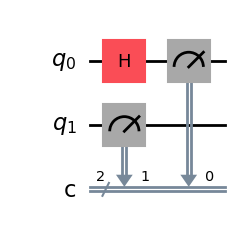

In [55]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Crear registros
qr = QuantumRegister(2, name='q')
cr = ClassicalRegister(2, name='c')

# Crear circuito cuántico
qc = QuantumCircuit(qr, cr)

# Aplicar compuertas de un solo qubit

qc.h(qr[0])


# Medición
qc.measure(qr, cr)


# Mostrar el circuito
qc.draw('mpl') #Esto permite realizar el dibujado utilizando MatPlotLib

Este es un ejemplo de un circuito que corre en 2 Qubits sobre el cual aplicamos el sistema. Es importante notar, que Qiskit invierte la notación de la que estamos acostumbrados a estudiar en el curso. Para qiskit, el qubit 0 es el último qubit en representarse, mientras que los qubit 1, 2, etc, son los primeros en representarse

Para poder trabajar con los circuitos que ya previamente habiamos realizado, debemos utilizar un Backend, el cual es un programa que permite correr las simulaciones para así poder visualizar como se ve la distribución de probabilidades de nuestro circuito cuántico.

Qiskit Aer es el módulo de Qiskit encargado de la simulación clásica de circuitos cuánticos.
Su función es permitirnos ejecutar un circuito cuántico en una computadora clásica, sin necesidad de hardware cuántico real.

In [56]:
from qiskit_aer import AerSimulator

# 1. Creamos un simulador cuántico
#    Usamos el método 'statevector', que internamente calcula el estado cuántico
backend = AerSimulator(method='statevector')

# 2. Ejecutamos el circuito cuántico
#    shots indica cuántas veces repetimos el experimento
job = backend.run(qc, shots=100)

# 3. Obtenemos los resultados de la simulación
resultados = job.result()

# 4. Extraemos los conteos de medición
counts = resultados.get_counts()

# Mostramos los resultados
counts


{'01': 56, '00': 44}

Igual podemos visualizarlos en un histograma con Qiskit.Visualization

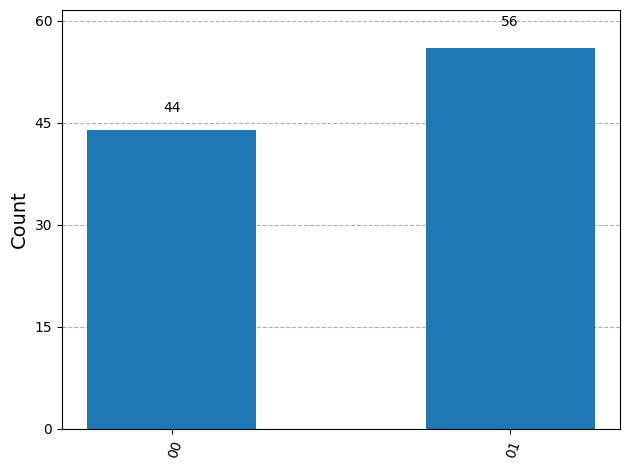

In [57]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

A partir de ahora, con las bases claras, vamos a trabajar en Códigos donde aplicaremos lo que ya sabemos desde 0 con la intención de aprender a manejar Qiskit con soltura

Aquí, QuantumCircuit nos hace la Chamba de QuantumRegister y ClassicalRegister en 1

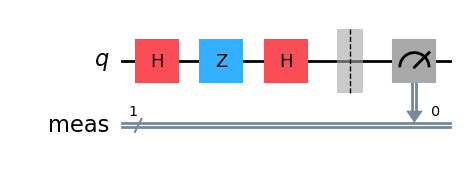

In [67]:
from qiskit import QuantumCircuit

# 1. Creamos un circuito cuántico con 1 qubit
#    No definimos registros clásicos explícitamente
circuito_hadamard = QuantumCircuit(1)

# 2. Aplicamos la compuerta Hadamard al qubit 0
#    Esto crea una superposición cuántica
circuito_hadamard.h(0)
circuito_hadamard.z(0)
circuito_hadamard.h(0)

# 3. Medimos todos los qubits del circuito
#    Qiskit crea automáticamente un registro clásico
circuito_hadamard.measure_all()

# 4. Dibujamos el circuito
circuito_hadamard.draw('mpl')


Viendo el circuito ¿Que estado se fabricó y que esperas medir con la simulación? Usaremos el mismo backend que usamos anteriormente

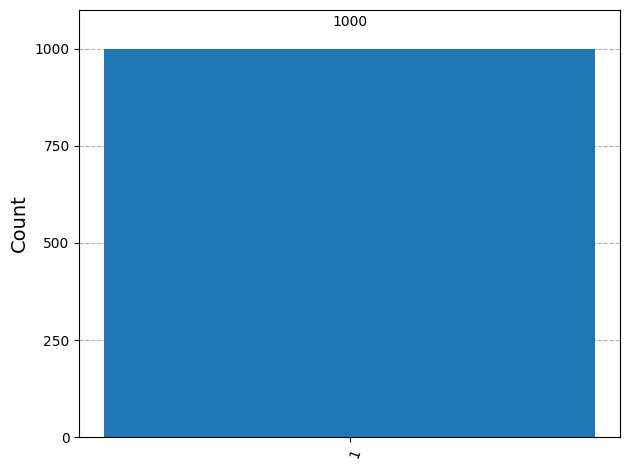

In [68]:
job = backend.run(circuito_hadamard,shots=1000)

resultados = job.result()
counts = resultados.get_counts()
plot_histogram(counts)

Ejercicio 1: Cambia UNA SOLA LETRA del código anterior para que la medición siempre mida 1

Ejercicio 2: Si aplicas una compuerta Z en lugar de una Hadamard, ¿Habria algun cambio en la simulación? ¿Por que?

Ejercicio 3: Aplica una compuerta Z sobre el Qubit despues de la compuerta Hadamard y finaliza aplicando una ultima compuerta Hadamard. ¿Cual es tu predicción de lo que vas a medir? ¿Esta predicción fue acertada?

$H|0⟩=\frac{1}{\sqrt{2}}(|0⟩+|1⟩)=|+⟩$


$\hat{Z}H|0⟩=\frac{1}{\sqrt{2}}(|0⟩-|1⟩)=|-⟩$

$\hat{H}\hat{Z}H|0⟩=|1⟩$


Ahora, vamos a fabricar Estados de Bell. ¿Recuerdas cuales son?

$|\Phi^{+}\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$


$|\Phi^{-}\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right)$


$|\Psi^{+}\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$

$|\Psi^{-}\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle - |10\rangle\right)$

Te dare el circuito para los estados $|\Phi^{+}\rangle$ y $|\Psi^{+}\rangle$. Tu tendras que fabricar los estados negativos en Qiskit

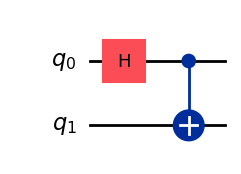

In [ ]:
from qiskit.quantum_info import Statevector

phimas=QuantumCircuit(2)
phimas.h(0)
phimas.cx(0,1)
phimas.draw('mpl')

In [ ]:
state = Statevector.from_instruction(phimas)

# Mostramos el statevector
state

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


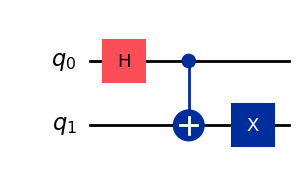

In [ ]:
psimas=QuantumCircuit(2)
psimas.h(0)
psimas.cx(0,1)
psimas.x(1)
psimas.draw('mpl')

In [ ]:
state = Statevector.from_instruction(psimas)

# Mostramos el statevector
state

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


Ahora, trabajemos con compuerta SWAP:

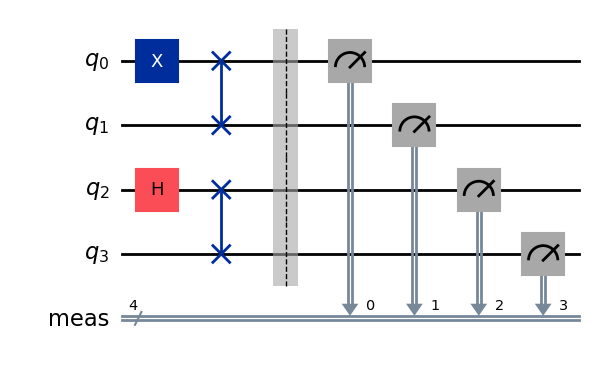

In [84]:
# Circuito con 2 qubits
swap_circuit = QuantumCircuit(4)

# Preparamos un estado distinguible
swap_circuit.x(0)        # Estado inicial |01⟩
swap_circuit.h(2)

# Aplicamos SWAP
swap_circuit.swap(0, 1)
swap_circuit.swap(2,3)

# Medimos ambos qubits
swap_circuit.measure_all()

# Dibujamos el circuito
swap_circuit.draw('mpl')


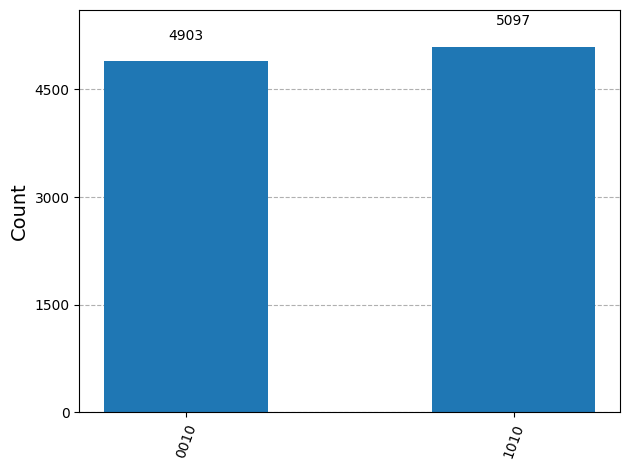

In [85]:
job = backend.run(swap_circuit, shots=10000)
result = job.result()

counts = result.get_counts()
plot_histogram(counts)


Ejercicio: Intenta aplicar una compuerta hadamard en uno de los qubits y visualiza como cambia el aplicar el SWAP a los 2 qubits

¿]Y si generalizamos el estado de bell, pero para 3 Qubits?

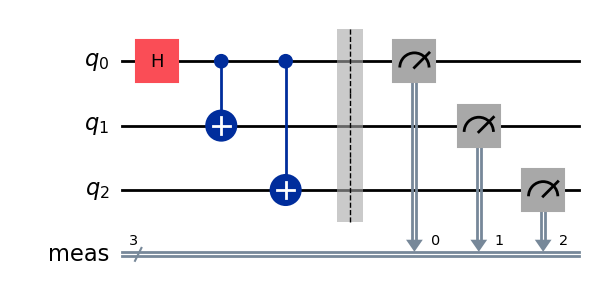

In [86]:
# Circuito de 3 qubits
ghz = QuantumCircuit(3)

# 1. Creamos superposición en el qubit 0
ghz.h(0)

# 2. Propagamos la correlación
ghz.cx(0, 1)
ghz.cx(0, 2)

# 3. Medimos todos los qubits
ghz.measure_all()

ghz.draw('mpl')


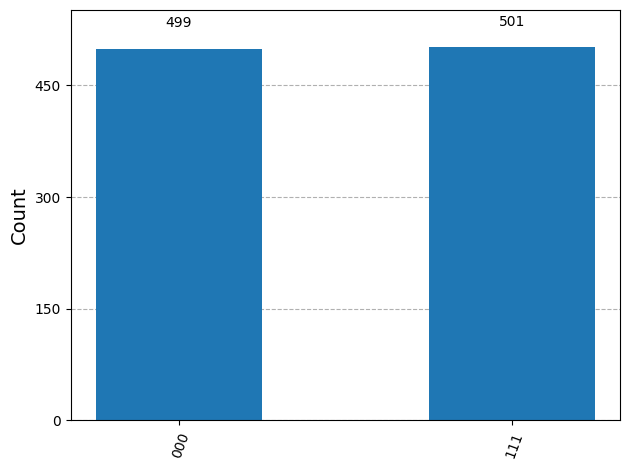

In [87]:
job = backend.run(ghz, shots=1000)
result = job.result()

counts = result.get_counts()
plot_histogram(counts)

Para terminar, vamos a ver los distintos tipos de compuertas que se pueden aplicar

$S =
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
$

$T =
\begin{pmatrix}
1 & 0 \\
0 & e^{i\pi/4}
\end{pmatrix}
$

$R_x(\theta) =
\begin{pmatrix}
\cos\frac{\theta}{2} & -i\sin\frac{\theta}{2} \\
-i\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{pmatrix}
$

$R_y(\theta) =
\begin{pmatrix}
\cos\frac{\theta}{2} & -\sin\frac{\theta}{2} \\
\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{pmatrix}
$

$R_z(\theta) =
\begin{pmatrix}
e^{-i\theta/2} & 0 \\
0 & e^{i\theta/2}
\end{pmatrix}
$

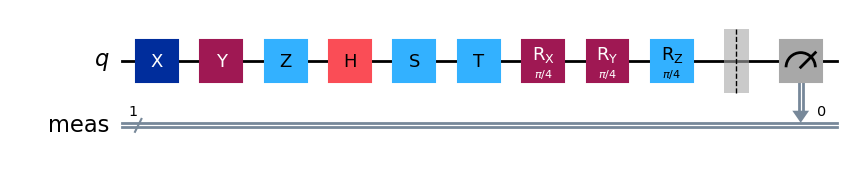

In [ ]:
import numpy as np

qc = QuantumCircuit(1)

qc.x(0)
qc.y(0)
qc.z(0)
qc.h(0)
qc.s(0)
qc.t(0)

qc.rx(np.pi/4, 0)
qc.ry(np.pi/4, 0)
qc.rz(np.pi/4, 0)


qc.measure_all()
qc.draw('mpl')


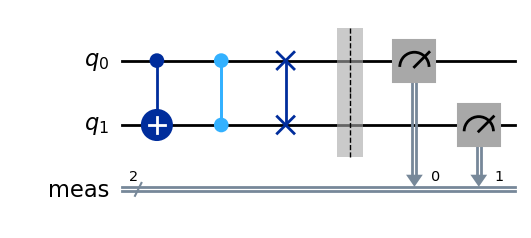

In [ ]:
qc2 = QuantumCircuit(2)

qc2.cx(0, 1)
qc2.cz(0, 1)
qc2.swap(0, 1)

qc2.measure_all()
qc2.draw('mpl')


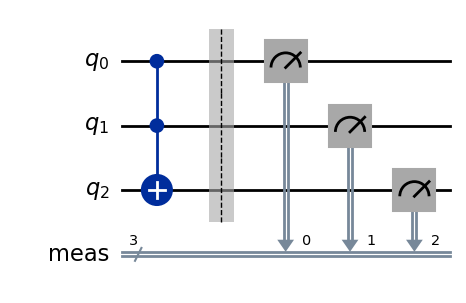

In [ ]:
qc3 = QuantumCircuit(3)

qc3.ccx(0, 1, 2) #Toffoli

qc3.measure_all()
qc3.draw('mpl')


Tarea: 1

1: Fabricar el circuito cuántico para $|\Phi^{-}\rangle$ y $|\Psi^{-}\rangle$ y recuperar tanto las mediciones como el statevector

2: Investigar que es una fase global en un sistema cuántico y explicarmelo con tus propias palabres y que ademas lo expliquen con un ejemeplo

3: Fabriquen un circuito usando por lo menos un sistema de 3 qubits y 5 compuertas, desarrollen matemáticamente el circuito para predecir que es lo que esperarían en las mediciones y corran las mediciones en qiskit. Recuerden que Qiskit invierte el orden del sistema